## Preprocessing

In [1]:
pip install keras-tuner

In [2]:
# Import necessary dependencies
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras_tuner as kt

In [3]:
# Import pandas and read the charity_data.csv from the provided cloud URL.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
# Get the features.
data = application_df.drop(["EIN", "NAME"], axis=1)
data.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
# Determine the number of unique values in each column.
# Count unique values in each column
unique_counts = data.nunique()
print(unique_counts)

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [6]:
applic_name_counts = data["APPLICATION_TYPE"].value_counts()
print(applic_name_counts)

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


In [7]:
# Choose a cutoff value and create a list of application types to be replaced
# Increased the cut off from 500 to 2500
cutoff = 2500
application_types_to_replace = list(applic_name_counts[applic_name_counts < cutoff].index)
application_types_to_replace

['T4',
 'T6',
 'T5',
 'T19',
 'T8',
 'T7',
 'T10',
 'T9',
 'T13',
 'T12',
 'T2',
 'T25',
 'T14',
 'T29',
 'T15',
 'T17']

In [8]:
# Iterate over the application types and identify those to be replaced
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
print(application_df['APPLICATION_TYPE'].value_counts())

APPLICATION_TYPE
T3       27037
Other     7262
Name: count, dtype: int64


In [9]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
class_counts = data["CLASSIFICATION"].value_counts()
print(class_counts)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64


In [10]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#class_counts = class_counts[CLASSIFICATION_TYPE>1] #Original line causing the error. 'CLASSIFICATION_TYPE' is not defined.

class_counts = class_counts[class_counts>1]
print(class_counts)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64


In [11]:
# Choose a cutoff value and create a list of classifications to be replaced
# Increased the cut off from 1000 to 3500
classes_to_replace = list(class_counts[class_counts < 3500].index) # Use class_counts for filtering

# Iterate over the classifications and identify those to be replaced
# Replace in the dataframe
for cls in classes_to_replace:
    data['CLASSIFICATION'] = data['CLASSIFICATION'].replace(cls, "Other")

In [12]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_encoded = pd.get_dummies(data, drop_first=True)
application_df_encoded.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,...,ORGANIZATION_Trust,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,108590,1,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,1,5000,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,6692,1,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
4,1,142590,1,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df_encoded['IS_SUCCESSFUL'].values
# drop 'IS SUCCESSFUL'
X = application_df_encoded.drop('IS_SUCCESSFUL', axis=1)

In [14]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Optimize the Model


In [16]:
!pip install keras-tuner


In [17]:
# Import the kerastuner library
import keras_tuner as kt

# Define the model-building function
def create_model(hp):
    """
    Creates a Keras model with hyperparameter tuning.

    Args:
        hp: HyperParameters object

    Returns:
        A compiled Keras model.
    """
    number_input_features = len(X_train_scaled[0])  # Access X_train_scaled from outer scope
    nn = tf.keras.models.Sequential()

    # Tune the number of units in the first Dense layer
    hp_units = hp.Int('units', min_value=8, max_value=128, step=8)
    nn.add(tf.keras.layers.Dense(units=hp_units, input_dim=number_input_features, activation="relu", kernel_initializer=tf.keras.initializers.VarianceScaling()))

    # Tune the number of units in the second Dense layer
    hp_units2 = hp.Int('units2', min_value=8, max_value=128, step=8)
    nn.add(tf.keras.layers.Dense(units=hp_units2, activation="relu", kernel_initializer=tf.keras.initializers.VarianceScaling()))

    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid", kernel_initializer=tf.keras.initializers.VarianceScaling()))

    # Compile the model
    nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return nn

# Now you can call kt.Hyperband with the create_model function
tuner = kt.Hyperband(create_model, objective="val_accuracy", max_epochs=20, hyperband_iterations=2)

Reloading Tuner from ./untitled_project/tuner0.json


In [18]:
%%time
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled, y_train,epochs=20,validation_data=(X_test_scaled, y_test))

CPU times: user 531 µs, sys: 0 ns, total: 531 µs
Wall time: 539 µs


In [19]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values


{'units': 112,
 'units2': 72,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0014'}

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 112
hidden_nodes_layer2 = 72
hidden_nodes_layer3 = 27
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu", kernel_initializer=tf.keras.initializers.VarianceScaling()))


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu", kernel_initializer=tf.keras.initializers.VarianceScaling()))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid", kernel_initializer=tf.keras.initializers.VarianceScaling()))

# Check the structure of the model
nn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 112)                 │           7,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 72)                  │           8,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              73 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,937 (62.25 KB)

 Trainable params: 15,937 (62.25 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Compile the model
nn_model = nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Epoch 1/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6954 - loss: 0.6017
Epoch 2/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7260 - loss: 0.5610
Epoch 3/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7290 - loss: 0.5577
Epoch 4/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7334 - loss: 0.5513
Epoch 5/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7277 - loss: 0.5538
Epoch 6/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7325 - loss: 0.5483
Epoch 7/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7334 - loss: 0.5496
Epoch 8/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7338 - loss: 0.5485
Epoch 9/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7292 - loss: 0.5534
Epoch 10/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7316 - loss: 0.5511
Epoch 11/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7327 - loss: 0.5488
Epoch 12/20
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/ste

<Axes: >

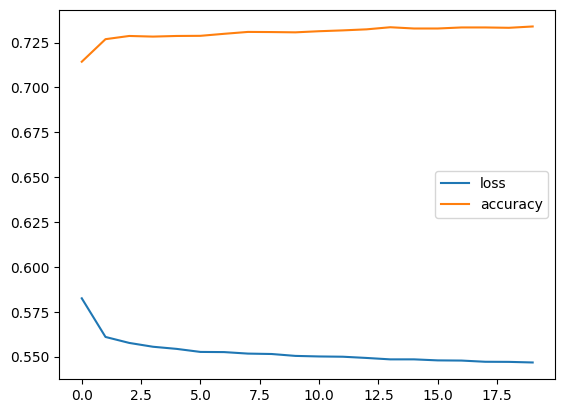

In [22]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=20)
history_df = pd.DataFrame(fit_model.history)
history_df.loc[:, ['loss', 'accuracy']].plot()

In [23]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - 3ms/step - accuracy: 0.7264 - loss: 0.5596
Loss: 0.5596412420272827, Accuracy: 0.7264139652252197


In [24]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_optimized.h5")